# **Computational Drug Discovery Comparing Regressors**




**We will use the Package of pycaret as its has low line of code for multiple regressors comparision and plots visualization.
 For interpertation models we use the Shap Package**

## **1. Install the Package's**

## **2. Load the data set**


**Import libraries**

In [2]:
import pandas as pd
from pycaret.regression import *

## **3. Data pre-processing**

Import Clean Fingerprint Files *.csv

In [4]:
ap2dc = pd.read_csv('SubstructureCount.csv')
#view
ap2dc

,Unnamed: 0,pIC50,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC16,SubFPC18,SubFPC19,SubFPC23,SubFPC28,SubFPC49,SubFPC96,SubFPC100,SubFPC135,SubFPC137,SubFPC143,SubFPC171,SubFPC172,SubFPC179,SubFPC180,SubFPC181,SubFPC182,SubFPC183,SubFPC274,SubFPC280,SubFPC294,SubFPC295,SubFPC301,SubFPC302
0,1,8.958607,0,5,1,0,0,0,0,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,18,0,0,9,15,3
1,2,9.397940,0,3,1,0,0,0,0,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,18,3,0,9,14,3
2,3,7.356547,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,18,0,0,9,5,3
3,4,9.045757,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,18,0,0,8,10,2
4,5,8.522879,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,0,0,0,0,18,0,0,8,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2182,5.853872,0,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,3,0,1,19,0,0,14,10,3
2182,2183,4.000000,1,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,2,0,1,14,0,0,11,10,3
2183,2184,8.301030,0,7,1,0,0,0,0,0,1,0,0,2,3,2,0,0,0,0,1,1,0,0,17,0,0,10,15,10
2184,2185,8.301030,0,2,0,0,0,1,0,0,0,1,0,0,0,6,0,0,2,0,0,0,0,0,18,0,0,7,10,6


In [5]:
model  = setup(data = ap2dc, target = 'pIC50', train_size=0.8, silent=True )

,Description,Value
0,session_id,8568
1,Target,pIC50
2,Original Data,"(2186, 30)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,25
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1748, 119)"


## **4. Compare ML algorithms**

In [4]:
models(internal=True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Linear Regression,False
lasso,Lasso Regression,False
ridge,Ridge Regression,False
en,Elastic Net,False
lar,Least Angle Regression,False
llar,Lasso Least Angle Regression,False
omp,Orthogonal Matching Pursuit,False
br,Bayesian Ridge,False
ard,Automatic Relevance Determination,False


In [6]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6190,0.7030,0.8367,0.4754,0.1070,0.0906,0.2810
lightgbm,Light Gradient Boosting Machine,0.6307,0.7248,0.8497,0.4596,0.1088,0.0923,0.0270
gbr,Gradient Boosting Regressor,0.6892,0.8167,0.9023,0.3931,0.1159,0.1019,0.1000
knn,K Neighbors Regressor,0.6561,0.8163,0.9020,0.3922,0.1146,0.0958,0.0170
et,Extra Trees Regressor,0.6913,0.9349,0.9648,0.3006,0.1225,0.1000,0.3220
br,Bayesian Ridge,0.7888,1.0066,1.0024,0.2539,0.1292,0.1175,0.0100
ridge,Ridge Regression,0.7915,1.0194,1.0085,0.2437,0.1296,0.1175,0.0060
huber,Huber Regressor,0.7824,1.0206,1.0092,0.2430,0.1299,0.1168,0.1030
ada,AdaBoost Regressor,0.8445,1.0901,1.0430,0.1941,0.1330,0.1230,0.0550
omp,Orthogonal Matching Pursuit,0.8204,1.0997,1.0475,0.1885,0.1358,0.1231,0.0070


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=8568, verbose=0, warm_start=False)

**Create Model On Selected Model**

In [7]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6049,0.6138,0.7835,0.5810,0.1019,0.0917
1,0.6447,0.7496,0.8658,0.5124,0.1116,0.0959
2,0.6641,0.7734,0.8794,0.2204,0.1074,0.0919
3,0.5946,0.6174,0.7858,0.5391,0.1018,0.0884
4,0.6025,0.6629,0.8142,0.4113,0.1048,0.0884
5,0.6530,0.7531,0.8678,0.4502,0.1087,0.0926
6,0.6078,0.6676,0.8171,0.5579,0.1024,0.0859
7,0.5943,0.6798,0.8245,0.5045,0.1048,0.0876
8,0.6906,0.9374,0.9682,0.3710,0.1290,0.1025
9,0.6507,0.7932,0.8906,0.4484,0.1157,0.0986


## **5. Tuning of model performance**

**Tuning the Hyperparameter**

In [8]:
tuned_lightgbm = tune_model(lightgbm, n_iter= 50,optimize='mae')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6095,0.6392,0.7995,0.5636,0.1044,0.0926
1,0.6616,0.8181,0.9045,0.4679,0.1168,0.0997
2,0.6651,0.7726,0.8790,0.2211,0.1076,0.0919
3,0.6202,0.6647,0.8153,0.5038,0.1054,0.0925
4,0.6060,0.6616,0.8134,0.4125,0.1032,0.0881
5,0.6427,0.7117,0.8436,0.4804,0.1055,0.0918
6,0.6445,0.7150,0.8456,0.5265,0.1055,0.0910
7,0.6314,0.7397,0.8600,0.4608,0.1105,0.0937
8,0.7007,0.9505,0.9749,0.3622,0.1289,0.1047
9,0.6752,0.8055,0.8975,0.4398,0.1171,0.1020


In [24]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=200, n_jobs=-1, num_leaves=100, objective=None,
              random_state=8568, reg_alpha=0.005, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Model Hyperparameter**

Original Model Parameters

In [ ]:
plot_model(lightgbm, 'parameter')

Tuned Model Parameters

In [ ]:
plot_model(tuned_lightgbm, 'parameter')

# **6. Model Analysis**

Details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

In [18]:
plot_model(tuned_lightgbm, 'residuals' , save =True)

'Residuals.png'

**Prediction Error Plot**

In [19]:
plot_model(tuned_lightgbm, 'error', save =True)

'Prediction Error.png'

**Recursive Feature Selection**

In [17]:
plot_model(tuned_lightgbm, 'feature', save =True)

'Feature Importance.png'

In [25]:
plot_model(tuned_lightgbm, 'rfe',save = True)

'Feature Selection.png'

**Learning Curve**

In [20]:
plot_model(tuned_lightgbm, 'learning' , save =True ) 

'Learning Curve.png'

**Validation Curve**

In [21]:
plot_model(tuned_lightgbm, 'vc', save = True) 

'Validation Curve.png'

**Model Interpretaion**

SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

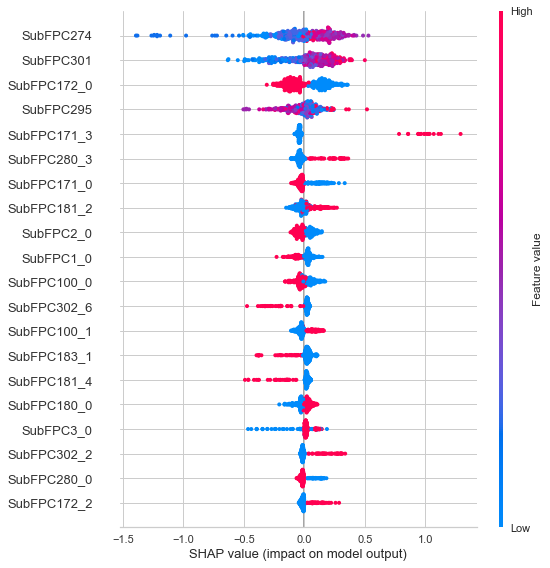

In [11]:
interpret_model(lightgbm)

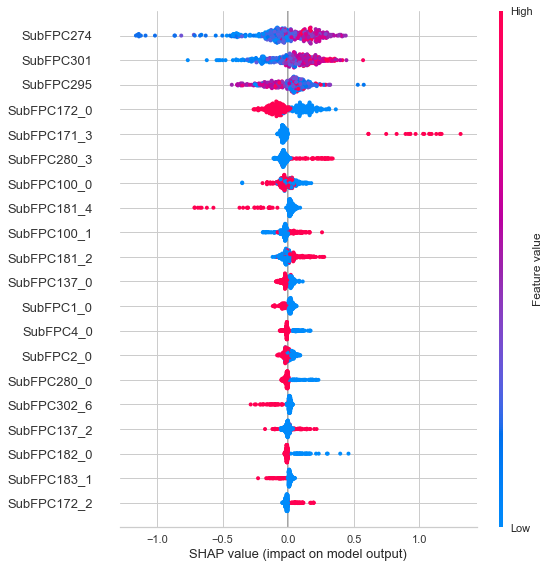

In [22]:
interpret_model(tuned_lightgbm , save =True)

**Correlation Plot**

**Reason Plot at Observation Level**

The Reason Plot at Observation Level as called by PyCaret is better known as the force plot and this plot essentially describes the push and pull effect that each individual features has on the base value that eventually leads to the predicted output value.


In [23]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 10 , save = True)  

# **Testing on 20% Model**

In [13]:
prediction_holdout = predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.6507,0.7137,0.8448,0.5209,0.1079,0.0958


In [14]:
# Predicted Value in "Label"  pIC50 experimantal
prediction_holdout.head()

,SubFPC274,SubFPC295,SubFPC301,SubFPC1_0,SubFPC1_1,SubFPC1_2,SubFPC1_3,SubFPC1_4,SubFPC1_5,SubFPC1_6,...,SubFPC302_2,SubFPC302_3,SubFPC302_4,SubFPC302_5,SubFPC302_6,SubFPC302_7,SubFPC302_8,SubFPC302_9,pIC50,Label
0,18.0,8.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.638272,7.368448
1,26.0,12.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.346787,8.011963
2,23.0,13.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.818156,7.493551
3,15.0,14.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.435334,7.295020
4,21.0,9.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.677781,6.867922


**Finalize Model**

In [15]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [16]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4841,0.3787,0.6154,0.7458,0.0792,0.0707


,SubFPC274,SubFPC295,SubFPC301,SubFPC1_0,SubFPC1_1,SubFPC1_2,SubFPC1_3,SubFPC1_4,SubFPC1_5,SubFPC1_6,...,SubFPC302_2,SubFPC302_3,SubFPC302_4,SubFPC302_5,SubFPC302_6,SubFPC302_7,SubFPC302_8,SubFPC302_9,pIC50,Label
0,18.0,8.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.638272,7.416315
1,26.0,12.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.346787,8.167757
2,23.0,13.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.818156,7.418435
3,15.0,14.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.435334,7.484118
4,21.0,9.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.677781,7.030336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,27.0,12.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.920819,7.374157
434,33.0,26.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.853872,7.429670
435,20.0,10.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.568636,8.165069
436,15.0,7.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.420217,8.394977


In [ ]:
save_experiment('SubstructureCount')